# FFT Filtering Example
### CS4243

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


In [2]:

# The function takes two dimension inputs for the filter image;
# the third para is D0, which defines the circle area of the LowPass Filter.
def idealLowPass(M, N, D0):
    # Initializing the filter with ones; since the filter is a complex function,
    # it has two channels, representing the real and imaginary parts:
   
    filter = np.ones((M, N), dtype=np.uint8)
    # normalized cut_off frequency is mapped to real index
    D0 = D0 * min(M,N) / 2
    # Scanning through each pixel and calculating the distance of each pixel
    # to the image center. If the pixel is within D0, it is changed to 0:
    for i in range(M):
        for j in range(N):
            if ( (i-M/2)**2 + (j-N/2)**2)**0.5 >= D0:
                filter[i,j]= 0
            
    return filter


In [3]:
# 
#  
def ButterworthLowPass(M, N, D0, n_o):
    #  
    filter = np.zeros((M, N))
    # normalized cut_off frequency is mapped to real index
    D0 = D0 * min(M,N) / 2
    n_o = 2 * n_o
    for i in range(M):
        for j in range(N):
            d = ( (i-M/2)**2 + (j-N/2)**2 )**0.5
            filter[i,j]= 1 / ( 1 + (d/D0)**n_o )
            
    return filter


In [4]:
# read the image, 0 means reading as gray level
gray = cv.imread("wm74_2.bmp", 0)

# Fourier transform
# output, img_dft, is a complex matrix of the image size
img_dft = np.fft.fft2(gray)

# we need to employ fftshift to bring the lower frequency components 
# to the centre of the frequency domain
dft_shift = np.fft.fftshift(img_dft)  # Move frequency domain from upper left to middle

print(img_dft.shape , type(img_dft), img_dft[0,0])


(427, 639) <class 'numpy.ndarray'> (37763895+0j)
(427, 639) <class 'numpy.ndarray'> (37763895+0j)


In [5]:
# filtering 

# finding the filter matrix size
M = gray.shape
# computing absolute or magnitude or power spectrum and phase of the FFT of the image
dft_shift_abs = np.abs(dft_shift)
dft_shift_phase = np.angle(dft_shift) 

# we build a filter, same size of the image and fft
# lowpass filters
#f = ButterworthLowPass(M[0], M[1], 0.4, 3) 
#f = idealLowPass(M[0], M[1], 0.4)

# if you want highpass filters ....
#f = 1- ButterworthLowPass(M[0], M[1], 0.4, 2) 
f = 1- idealLowPass(M[0], M[1], 0.4)


# filtering, element wise multiplication
dft_shift_abs = np.multiply(dft_shift_abs,f) 
# building the complext matrix after filtering 
z = np.multiply ( dft_shift_abs , np.exp((1j)*(dft_shift_phase)) )

# fftshift used to re-shift the frequency components to their original place
# and make them ready for inverse fft transform
idft_shift = np.fft.ifftshift(z)  #Move the frequency domain from the middle to the upper left corner


In [6]:
# showing the results, filtered image in the fft domain
# Z is a complex matrix, same size of your image, real and imaginary elements can be seen here
print(z)
print(z.shape)
print(np.min(dft_shift_phase) , '     ', np.min(np.abs(z)))
print(np.max(dft_shift_phase) , '     ', np.max(np.abs(z)))

[[  65.40393631 +97.74404369j -134.02498454+162.20732572j
   201.27700016  +3.04351658j ...  -64.14326815+161.77614234j
    -8.55948483 -50.15054475j   90.42847624-132.16918958j]
 [-108.71007784-746.74166409j  -69.427195  +118.7340773j
    60.51362439-122.99393559j ...  -45.98097068-311.22205274j
   -38.1641009  +54.26233452j -398.28707274+320.2615612j ]
 [-249.96025284+395.47683205j  -48.07221133-328.08081334j
    10.7960102 +117.45223328j ... -232.59036826-191.85935199j
   238.03890235-297.39295531j  308.66420818+100.62098252j]
 ...
 [ 308.66420818-100.62098252j  238.03890235+297.39295531j
  -232.59036826+191.85935199j ...   10.7960102 -117.45223328j
   -48.07221133+328.08081334j -249.96025284-395.47683205j]
 [-398.28707274-320.2615612j   -38.1641009  -54.26233452j
   -45.98097068+311.22205274j ...   60.51362439+122.99393559j
   -69.427195  -118.7340773j  -108.71007784+746.74166409j]
 [  90.42847624+132.16918958j   -8.55948483 +50.15054475j
   -64.14326815-161.77614234j ...  201.2770

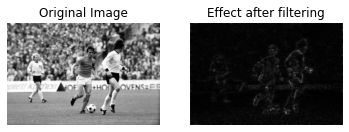

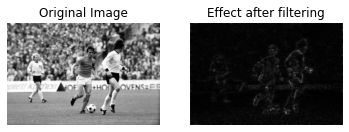

In [7]:
# inverset fft, image is back to the spatial domain, abs is necessary since the output of
# inverse fourier, ifft, is complex
#
ifimg = np.fft.ifft2(idft_shift)  # Fourier library function call
ifimg = np.abs(ifimg)

# showing the result
cv.imshow("ifimg",np.uint8(ifimg))
cv.imshow("gray",gray)


# Draw pictures
plt.subplot(121), plt.imshow(gray, 'gray'), plt.title('Original Image')
plt.axis('off')

plt.subplot(122), plt.imshow(np.uint8(ifimg), 'gray'), plt.title('Effect after filtering')
plt.axis('off')

plt.show()
cv.waitKey(0)
cv.destroyAllWindows()